# Figure S4

In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd

import replay_structure.structure_models as models
import replay_structure.metadata as meta
import replay_structure.read_write as read_write

import importlib

In [2]:
SMALL_SIZE = 5
MEDIUM_SIZE = 6
BIGGER_SIZE = 7

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [3]:
run_snippet_data_60ms = dict()
run_snippet_trajectories = dict()
for session in meta.Session_List:
    run_snippet_data_60ms[str(session)] = read_write.load_spikemat_data(session, meta.Run_Snippet_Data.default_time_window_ms, meta.Run_Snippet_Data.name, ext="")
    run_snippet_trajectories[str(session)] = read_write.load_trajectory_results(session, meta.Run_Snippet_Data.default_time_window_ms, meta.Run_Snippet_Data.name,meta.Run_Snippet_Data.default_likelihood_function, ext="_74")

loading  /Users/emmakrause/Documents/PhD/Lab/replay_structure/data_final/run_snippets/rat1day1_4cm_60ms.obj
loading  /Users/emmakrause/Documents/PhD/Lab/replay_structure/results_final/run_snippets/rat1day1_4cm_60ms_poisson_trajectories_74.obj
loading  /Users/emmakrause/Documents/PhD/Lab/replay_structure/data_final/run_snippets/rat1day2_4cm_60ms.obj
loading  /Users/emmakrause/Documents/PhD/Lab/replay_structure/results_final/run_snippets/rat1day2_4cm_60ms_poisson_trajectories_74.obj
loading  /Users/emmakrause/Documents/PhD/Lab/replay_structure/data_final/run_snippets/rat2day1_4cm_60ms.obj
loading  /Users/emmakrause/Documents/PhD/Lab/replay_structure/results_final/run_snippets/rat2day1_4cm_60ms_poisson_trajectories_74.obj
loading  /Users/emmakrause/Documents/PhD/Lab/replay_structure/data_final/run_snippets/rat2day2_4cm_60ms.obj
loading  /Users/emmakrause/Documents/PhD/Lab/replay_structure/results_final/run_snippets/rat2day2_4cm_60ms_poisson_trajectories_74.obj
loading  /Users/emmakrause/D

In [4]:
viterbi_aligned_to_pos_rec = dict()

for session in meta.Session_List:
    viterbi_aligned_to_pos_rec[str(session)] = dict()
    for i in range(len(run_snippet_data_60ms[str(session)].run_info['true_trajectories_cm'])):
        if run_snippet_data_60ms[str(session)].run_info['true_trajectories_cm'][i] is not None:
            pos_t = np.arange(len(run_snippet_data_60ms[str(session)].run_info['true_trajectories_cm'][i])) * (1000/30)
            viterbi_t = np.arange(len(run_snippet_trajectories[str(session)].most_likely_trajectories[i])) * 60
            viterbi_ind = np.zeros(len(run_snippet_data_60ms[str(session)].run_info['true_trajectories_cm'][i]))
            for j, t in enumerate(pos_t):
                viterbi_ind[j] = np.argmin(np.abs(viterbi_t - t))
            viterbi_aligned_to_pos_rec[str(session)][i] = run_snippet_trajectories[str(session)].most_likely_trajectories[i][viterbi_ind.astype(int)]
        else:
            viterbi_aligned_to_pos_rec[str(session)][i] = None

In [5]:
errors = dict()
n_notnone = dict()
for session in meta.Session_List:
    errors[str(session)] = np.array([])
    n_notnone[str(session)] = 0
    for i in range(len(viterbi_aligned_to_pos_rec[str(session)])):
        if viterbi_aligned_to_pos_rec[str(session)][i] is not None:
            errors[str(session)] = np.append(errors[str(session)], np.sqrt(np.sum((viterbi_aligned_to_pos_rec[str(session)][i] - run_snippet_data_60ms[str(session)].run_info['true_trajectories_cm'][i])**2, axis=1)))
            n_notnone[str(session)] += 1

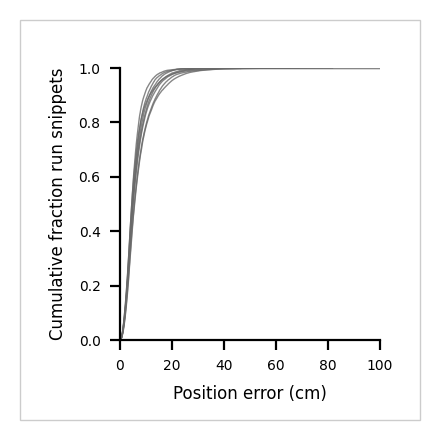

In [7]:
fig, ax = plt.subplots(1, 1, figsize=(2,2), dpi=200)
plt.subplots_adjust(left=.25, bottom = .2)
for session in meta.Session_List:
    ax.plot(np.sort(errors[str(session)]), np.arange(len(errors[str(session)]))/len(errors[str(session)]), color='dimgray', alpha=.8, linewidth=.5)
ax.set_xlim([0,100])
ax.set_ylabel('Cumulative fraction run snippets')
ax.set_xlabel('Position error (cm)')
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.set_ylim([0,1])

plt.savefig(os.path.join(meta.FIGURES_PATH, "FigureS4.svg"), dpi=500, transparent=True)

rect = plt.Rectangle(
    # (lower-left corner), width, height
    (0, 0), 1, 1, fill=False, color="k", lw=.5, alpha=.2,
    zorder=1000, transform=fig.transFigure, figure=fig
)
fig.patches.extend([rect])

plt.show()